In [1]:
import numpy as np

In [2]:
# square playground of 100x100
# Each point has values from +100 to -100 randomly as weights
# Choose rectangular bounding box to maximmize points weight
# Fixing random state for reproducibility
np.random.seed(1000)
num_points = 50

x_axis_points = np.random.rand(num_points)*100
y_axis_points = np.random.rand(num_points)*100
weights = np.random.rand(num_points)*200-100

x_axis_points_int = [int(x) for x in x_axis_points]
y_axis_points_int = [int(y) for y in y_axis_points]
weights = [int(w) for w in weights]

In [3]:
import matplotlib.pyplot as plt

In [4]:
sum_weights_x = []
for index_x in range(100):
    choose_index = [True if x>=index_x else False for x in x_axis_points_int]
    sum_weights = np.sum([w if x else 0 for x,w in zip(choose_index,weights)])
    sum_weights_x.append(sum_weights)

sum_weights_y = []
for index_y in range(100):
    choose_index = [True if x>=index_y else False for x in y_axis_points_int]
    sum_weights = np.sum([w if y else 0 for y,w in zip(choose_index,weights)])
    sum_weights_y.append(sum_weights)

In [5]:
def detect_maxima(sum_weights_x,sum_weights_y):
    sum_weights_dx = np.diff(sum_weights_x)
    sum_weights_dy = np.diff(sum_weights_y)
    inflection_pts_increase_x = np.where(sum_weights_dx > 0)
    inflection_pts_decrease_x = np.where(sum_weights_dx < 0)
    inflection_pts_increase_y = np.where(sum_weights_dy > 0)
    inflection_pts_decrease_y = np.where(sum_weights_dy < 0)
    
    inflection_pts_x = np.sort(np.append(inflection_pts_increase_x,inflection_pts_decrease_x))
    inflection_pts_y = np.sort(np.append(inflection_pts_increase_y,inflection_pts_decrease_y))
    return inflection_pts_x,inflection_pts_y

In [6]:
def calc_weight_with_coordinates(x1,y1,x2,y2,x_axis_points_int,y_axis_points_int):
    choose_index_func = [True if x>x1 and x<x2 and y>y1 and y<y2 else False for x,y in zip(x_axis_points_int,y_axis_points_int)]
    sum_weights = np.sum([w if y==True else 0 for y,w in zip(choose_index_func,weights)])
    return sum_weights,np.sum(choose_index_func)

In [7]:
inflection_pts_x,inflection_pts_y = detect_maxima(sum_weights_x,sum_weights_y)
ignore_areas = []
for counter_x in range(len(inflection_pts_x)-1):
    max_area = 0
    for counter_y in range(len(inflection_pts_y)-1):
        sum_weights, no_points = calc_weight_with_coordinates(inflection_pts_x[counter_x],
                                     inflection_pts_y[counter_y],
                                     inflection_pts_x[counter_x+1],
                                     inflection_pts_y[counter_y+1],
                                    x_axis_points_int,y_axis_points_int)
        if sum_weights==0 and no_points==0:
            area = (inflection_pts_x[counter_x+1]-inflection_pts_x[counter_x])*(inflection_pts_y[counter_y+1]-inflection_pts_y[counter_y])
            if area > max_area:
                max_area=area
                ignore_areas.append((inflection_pts_x[counter_x],
                                     inflection_pts_y[counter_y],
                                     inflection_pts_x[counter_x+1],
                                     inflection_pts_y[counter_y+1]))

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


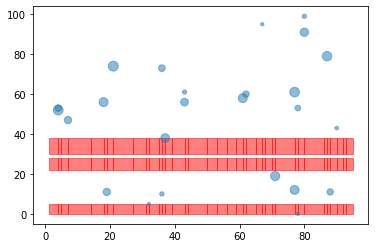

In [8]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

fig,ax = plt.subplots(1)
for coord in ignore_areas:
    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((coord[0],coord[1]),coord[2]-coord[0],coord[3]-coord[1])]
    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor='r', alpha=0.5,edgecolor='r')
    ax.add_collection(pc)
plt.scatter(x_axis_points_int, y_axis_points_int, s=weights,alpha=0.5)

In [9]:
calc_weight_with_coordinates(0,40,99,99,x_axis_points_int,y_axis_points_int)

(-54, 34)

In [10]:
calc_weight_with_coordinates(0,5,99,22,x_axis_points_int,y_axis_points_int)

(106, 7)